In [10]:
print("hello")

hello


# Anomaly Detection & Time Series Assignment

1. What is Anomaly Detection? Explain its types (point, contextual, and
collective anomalies) with examples.
 - Anomaly Detection is the process of identifying data points that deviate significantly from normal patterns in a dataset. It is widely used in fraud detection, fault detection, and network security.
    
    Point anomalies are individual data points that are abnormal, such as a sudden spike in credit card spending.
    
    Contextual anomalies depend on context, like high electricity usage during midnight.
    
    Collective anomalies occur when a group of data points together form an abnormal pattern, such as continuous network traffic spikes.
    Choosing the right anomaly type depends on domain knowledge and data structure.

2. Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of
their approach and suitable use cases.
- Isolation Forest isolates anomalies by randomly partitioning data and works well on high-dimensional datasets.
    
    DBSCAN is a density-based clustering algorithm that identifies outliers as noise points in low-density regions.
    
    Local Outlier Factor (LOF) measures how isolated a point is relative to its neighbors.

    Isolation Forest is fast and scalable, DBSCAN is effective for spatial data, and LOF is suitable for local density-based anomalies.
    The choice depends on data size, shape, and real-time requirements.

3. What are the key components of a Time Series? Explain each with one
example.
- A time series consists of trend, seasonality, cyclical, and residual components.
Trend represents the long-term increase or decrease, such as rising yearly sales.
Seasonality refers to repeating patterns like higher sales during festivals.
Cyclical components capture irregular economic cycles.
Residual or noise includes random variations not explained by other components.
Understanding these components helps in forecasting and anomaly detection.

4. Define Stationary in time series. How can you test and transform a
non-stationary series into a stationary one?
- A stationary time series has constant mean, variance, and autocorrelation over time.
Most time series models assume stationarity for reliable predictions.
We can test stationarity using the Augmented Dickey-Fuller (ADF) test.
Non-stationary series can be transformed using differencing, logarithmic transformation, or detrending.
Making a series stationary improves model performance and interpretability.

5. Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application.
-  Autoregressive (AR) model explains a time series using its own past values. In this model, the current value depends linearly on a fixed number of previous observations, called lags. It is mainly applied when the series is stationary and shows strong correlation with its past values, such as predicting stock prices over short periods or modeling sensor readings.

    The Moving Average (MA) model explains the current value of a time series using past forecast errors instead of past observations. It is useful for stationary data where random shocks have short-term effects, such as noise reduction or error correction.

    ARIMA (Autoregressive Integrated Moving Average) combines AR and MA models with differencing to handle non-stationary data. Represented as ARIMA(p, d, q), it is widely used for forecasting time-dependent data like sales, demand, and financial trends.

    SARIMA (Seasonal ARIMA) extends ARIMA by modeling seasonal patterns using additional seasonal parameters. It is suitable for data with regular cycles, such as monthly electricity usage or quarterly sales.

    SARIMAX further enhances SARIMA by including exogenous variables that influence the time series. It improves prediction accuracy in scenarios where external factors like weather, promotions, or pricing impact the target variable.

Index(['Month', '#Passengers'], dtype='object')


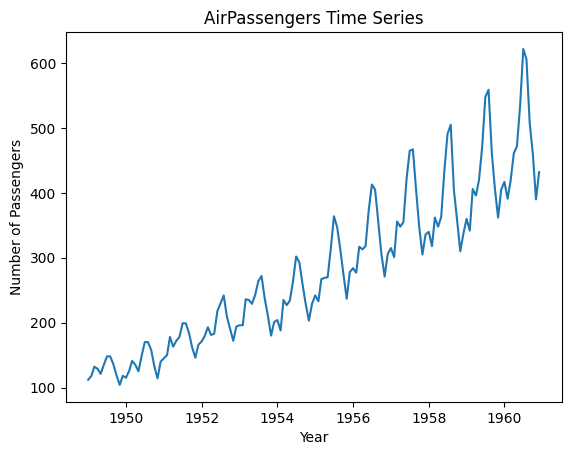

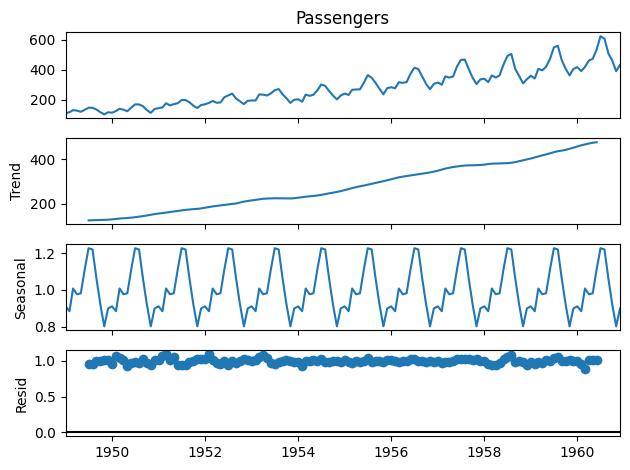

In [12]:
'''
6. Load a time series dataset (e.g., AirPassengers), plot the original series,
and decompose it into trend, seasonality, and residual components

'''
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load dataset from PDF
df = pd.read_csv('/content/AirPassengers.csv')

print(df.columns)

# Rename passenger column automatically
for col in df.columns:
    if 'pass' in col.lower():
        df.rename(columns={col: 'Passengers'}, inplace=True)

# Convert Month column to datetime
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Plot original series
plt.figure()
plt.plot(df.index, df['Passengers'])
plt.title('AirPassengers Time Series')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()

# Decompose time series
decomposition = seasonal_decompose(df['Passengers'], model='multiplicative')

decomposition.plot()
plt.show()


Numerical data shape: (1145092, 15)


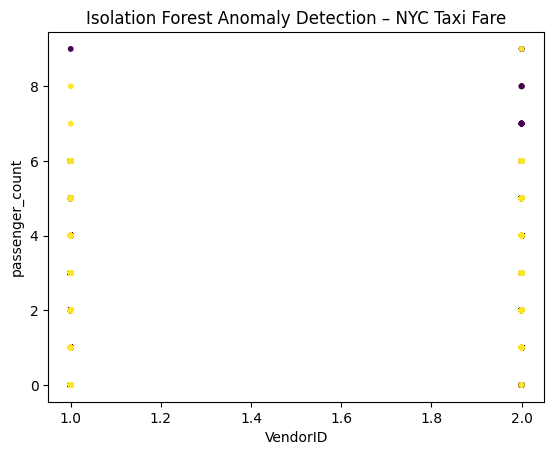

In [13]:
'''
 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to
detect anomalies. Visualize the anomalies on a 2D scatter plot.

'''
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Load uploaded NYC Taxi Fare dataset
df = pd.read_csv('/content/NYC_taxi_fare_data.csv')

num_df = df.select_dtypes(include=['int64', 'float64']).copy()
num_df = num_df.apply(pd.to_numeric, errors='coerce').dropna()

print("Numerical data shape:", num_df.shape)

iso = IsolationForest(n_estimators=100, contamination=0.02, random_state=42)
num_df['anomaly'] = iso.fit_predict(num_df)


x_col, y_col = num_df.columns[0], num_df.columns[1]

plt.figure()
plt.scatter(num_df[x_col], num_df[y_col], c=num_df['anomaly'], s=10)
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title('Isolation Forest Anomaly Detection – NYC Taxi Fare')
plt.show()


Index(['Month', '#Passengers'], dtype='object')


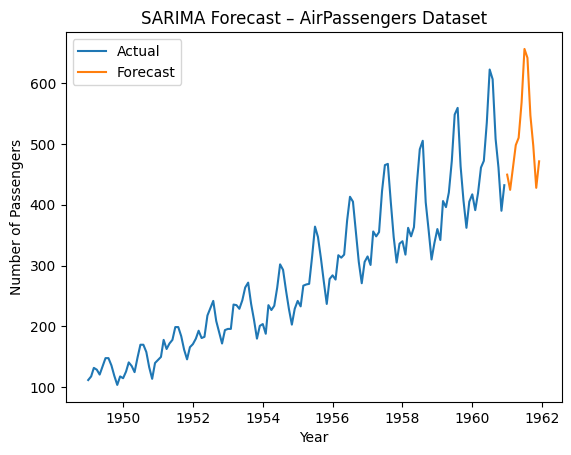

In [15]:
'''
8.Train a SARIMA model on the monthly airline passengers dataset.
Forecast the next 12 months and visualize the results.

'''
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/content/AirPassengers.csv')

print(df.columns)

for col in df.columns:
    if 'pass' in col.lower():
        df.rename(columns={col: 'Passengers'}, inplace=True)

df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

model = SARIMAX(
    df['Passengers'],
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12)
)

results = model.fit(disp=False)

forecast = results.get_forecast(steps=12)
forecast_values = forecast.predicted_mean
forecast_index = pd.date_range(
    start=df.index[-1] + pd.offsets.MonthEnd(1),
    periods=12,
    freq='M'
)

plt.figure()
plt.plot(df.index, df['Passengers'], label='Actual')
plt.plot(forecast_index, forecast_values, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('SARIMA Forecast – AirPassengers Dataset')
plt.legend()
plt.show()


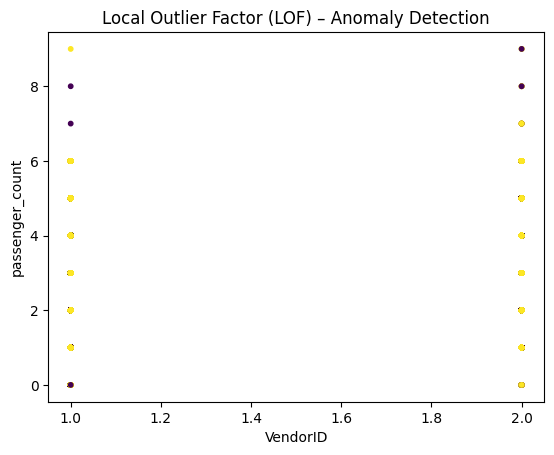

In [16]:
'''
9.Apply Local Outlier Factor (LOF) on any numerical dataset to detect
anomalies and visualize them using matplotlib.

'''
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/content/NYC_taxi_fare_data.csv')

num_df = df.select_dtypes(include=['int64', 'float64']).copy()
num_df = num_df.apply(pd.to_numeric, errors='coerce').dropna()

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.02)
num_df['anomaly'] = lof.fit_predict(num_df)

# LOF: -1 = anomaly, 1 = normal
x_col, y_col = num_df.columns[0], num_df.columns[1]

plt.figure()
plt.scatter(
    num_df[x_col],
    num_df[y_col],
    c=num_df['anomaly'],
    s=10
)
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title('Local Outlier Factor (LOF) – Anomaly Detection')
plt.show()

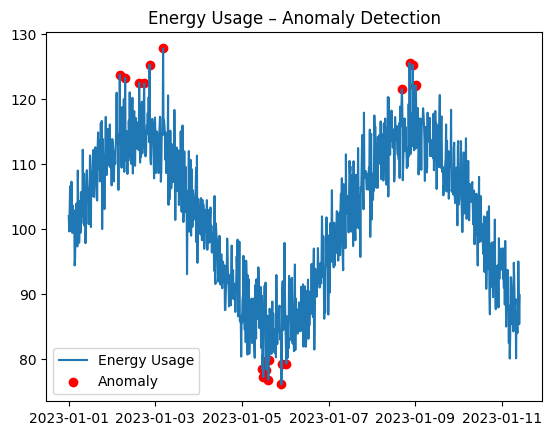

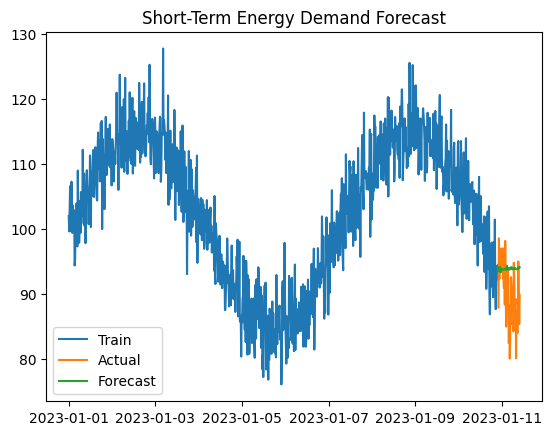

MAE: 4.776801175867494


In [17]:
'''
10. You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in
real-time consumption data collected every 15 minutes. The dataset includes features
like timestamp, region, weather conditions, and energy usage.
Explain your real-time data science workflow:
● How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)?
● Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?
● How would you validate and monitor the performance over time?
● How would this solution help business decisions or operations?

'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

# 1. Simulated power grid data
np.random.seed(42)
date_range = pd.date_range("2023-01-01", periods=1000, freq="15min")

energy = 100 + 15*np.sin(np.arange(1000)/96) + np.random.normal(0, 4, 1000)
temp = 25 + 4*np.sin(np.arange(1000)/96) + np.random.normal(0, 1, 1000)

df = pd.DataFrame({
    "timestamp": date_range,
    "energy_usage": energy,
    "temperature": temp
}).set_index("timestamp")

# 2. Anomaly Detection – Isolation Forest
iso = IsolationForest(contamination=0.02, random_state=42)
df["anomaly"] = iso.fit_predict(df[["energy_usage"]])

plt.figure()
plt.plot(df.index, df["energy_usage"], label="Energy Usage")
plt.scatter(
    df[df["anomaly"] == -1].index,
    df[df["anomaly"] == -1]["energy_usage"],
    color="red",
    label="Anomaly"
)
plt.title("Energy Usage – Anomaly Detection")
plt.legend()
plt.show()

# 3. SARIMAX (LIGHT & FAST)
train = df.iloc[:-48]
test = df.iloc[-48:]

model = SARIMAX(
    train["energy_usage"],
    exog=train[["temperature"]],
    order=(1,1,0),          # simplified
    seasonal_order=(0,0,0,0)  # removed heavy seasonality
)

results = model.fit(disp=False)

forecast = results.forecast(
    steps=48,
    exog=test[["temperature"]]
)

# 4. Forecast Visualization
plt.figure()
plt.plot(train.index, train["energy_usage"], label="Train")
plt.plot(test.index, test["energy_usage"], label="Actual")
plt.plot(test.index, forecast, label="Forecast")
plt.title("Short-Term Energy Demand Forecast")
plt.legend()
plt.show()

# 5. Validation
mae = mean_absolute_error(test["energy_usage"], forecast)
print("MAE:", mae)

